# Bipolar Junction Transistor (BJT)

## Import and Formatting

The goal of this section is to import all the necessary files and libraries required for the subsequent data analysis.  
It also includes setting up the formatting parameters for the plots and visualizations.

### Import

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm
from PySpice.Spice.Netlist import (
    Circuit, SubCircuitFactory
)
from PySpice.Unit import *
from PySpice.Spice.Library import SpiceLibrary

### Formatting

Adjusting Plotly chart settings for clarity and consistency.

In [2]:
# ----  Formatting charts
%matplotlib inline
from IPython.core.pylabtools import figsize
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 2.0
mpl.rcParams['axes.edgecolor']  = "#bcbcbc"
mpl.rcParams['patch.linewidth'] = 0.5
mpl.rcParams['legend.fancybox'] = True
mpl.rcParams['axes.facecolor']  = "#eeeeee"
mpl.rcParams['axes.labelsize']  = "large"
mpl.rcParams['axes.grid']       = True
mpl.rcParams['grid.linestyle']  = "--"
mpl.rcParams['patch.edgecolor'] = "#eeeeee"
mpl.rcParams['axes.titlesize']  = "x-large"

## Introduction

A **bipolar junction transistor (BJT)** is a semiconductor device belonging to the transistor family.
It is one of the most widely used types of transistors in electronics — both for **small-signal amplification** and in **digital logic circuits** to form basic logic gates (e.g., OR, AND, etc.).

## Circuit Structure

As shown in Figures [](#transistor-pnp) and [](#transistor-npn), there are two main types of bipolar transistors: **PNP** and **NPN**.
Both share three terminals:

* **E** – *Emitter*
* **C** – *Collector*
* **B** – *Base*

The only difference between the two symbols lies in the **direction of the arrow**.
This arrow indicates the **conventional current direction** and must be placed carefully when designing a circuit — reversing it or misplacing the terminals can completely change the transistor’s behavior.

::::{grid} 2
:gutter: 1

:::{grid-item}
```{figure} ./images/IEEE_315-1975_(1993)_8.6.1.svg
:name: transistor-pnp
:align: center
:width: 200px

Circuit PNP
```
:::

:::{grid-item}
```{figure} ./images/IEEE_315-1975_(1993)_8.6.2.svg
:name: transistor-npn
:align: center
:width: 200px

Circuit NPN
```
:::
::::

### Physique

La physique d'un transistor bipolaire est une partie très interssante, mais pour l'instant, cette partie n'est qu'un résumé grossier. 

NPN et PNP et l'ordre dans lequel le transistor est dopé. Si le transistor est un NPN alors il est dopé négativement, puis positivement et ensuite négativement. Pour le PNP c'est l'inverse il est tout d'abord, dopé positivement puis négativement et enfin positivement. Cela est montrer sur la [](#comparaison-PNP-NPN)

```{figure} ./images/comparaison-npn-pnp.svg
:name: comparaison-PNP-NPN
:align: center
:width: 500px

Comparaison entre un transistor NPN et PNP
```

## Theoretical Equations

The goal of this section is to review the key equations governing a bipolar transistor.

First, the simplest relationship is between the **base and emitter**. This can be modeled as a diode, which has two states. If the voltage between the base and emitter is below the threshold voltage - typically around 0.7 V - the voltage across the junction is effectively 0 V. If the base-emitter voltage exceeds 0.7 V, it becomes fixed at 0.7 V.

```{figure} ./images/Diagrama_de_Transistor_NPN.svg
:name: transistor-npn-diagram
:align: center
:width: 200px

NPN transistor diagram
```

$$
V_\text{BE} =
\begin{cases}
V_\text{BE} < 0.7\ \text{V} \quad \rightarrow \quad V_\text{BE} = 0\ \text{V} \quad (\text{transistor off}) \\
V_\text{BE} > 0.7\ \text{V} \quad \rightarrow \quad V_\text{BE} = 0.7\ \text{V} \quad (\text{transistor on})
\end{cases}
$$

When the transistor is **on**, the relationship between the output current (emitter current) and the input current (collector current) is given by:

$$
\begin{cases}
I_{C} = f(I_{E})\\
I_{C} = I_{E} \frac{\beta_{CC}}{\beta_{CC} + 1}
\end{cases}
$$

Conversely, we can express the emitter current as a function of the collector current:

$$
\begin{cases}
I_{E} = f(I_{C})\\
I_{E} = I_{C} \frac{\beta_{CC}+1}{\beta_{CC}}
\end{cases}
$$

With $\beta$ being an internal transistor parameter provided by the manufacturer, the relationship between the three currents in the transistor is:

$$
I_E = I_B + I_C
$$

Finally, an important point is the power dissipated by the transistor, which is crucial to determine whether additional cooling measures are required:

$$
P = V_\text{CE} \cdot I_C
$$

In the next sections, the goal is to visualize these equations in practice.

## Visualizing the Equations

The goal of this section is to visualize the different equations and observe how they behave in an **NGSPACE** simulation.
The test setup used for this purpose is shown in [](#montage_test_transistor_bipolaire).

```{figure} ./images/montage_test_transistor_bipolaire.svg
:name: montage_test_transistor_bipolaire
:align: center
:width: 500px

Test setup for a bipolar transistor
```

In [3]:
circuit = Circuit('Transistor')

circuit.include("lib/bjt.lib")

Vbase = circuit.V('base', '1', circuit.gnd, 1@u_V)
circuit.R('base', 1, 'base', 1@u_kΩ)
Vcollector = circuit.V('collector', '2', circuit.gnd, 0@u_V)
circuit.R('collector', 2, 'collector', 1@u_kΩ)
circuit.BJT(1, 'collector', 'base', circuit.gnd, model='2n2222a');

In [4]:
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.dc(Vbase=slice(0, 3, .01))

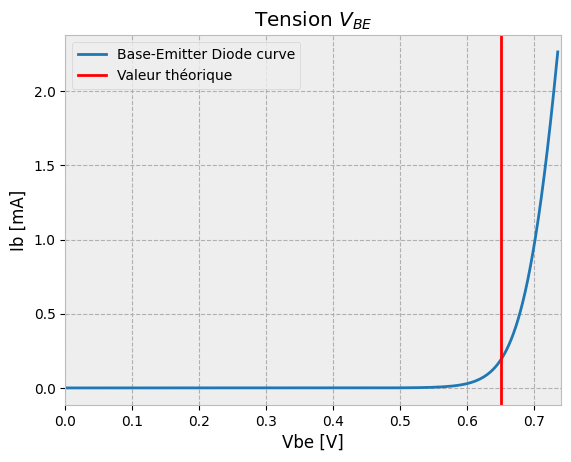

In [5]:
plt.figure()
plt.title("Tension $V_{BE}$")
plt.plot(analysis.base, u_mA(-analysis.Vbase)) 
plt.axvline(x=.65, color='red')
plt.legend(('Base-Emitter Diode curve', 'Valeur théorique'))
plt.xlabel('Vbe [V]')
plt.ylabel('Ib [mA]')
plt.xlim(0, .74)
plt.show()

Il est possible de voir la tension entre la base et le collecteur, c'est une courbe qui est très proche de la fonction de transfert d'une diode. 

In [6]:
circuit = Circuit('Transistor')

circuit.include("lib/bjt.lib")

Ibase = circuit.I('base', circuit.gnd, 'base', 10@u_uA) 
Vcollector = circuit.V('collector', 'collector', circuit.gnd, 5)
circuit.BJT(1, 'collector', 'base', circuit.gnd, model='2n2222a');

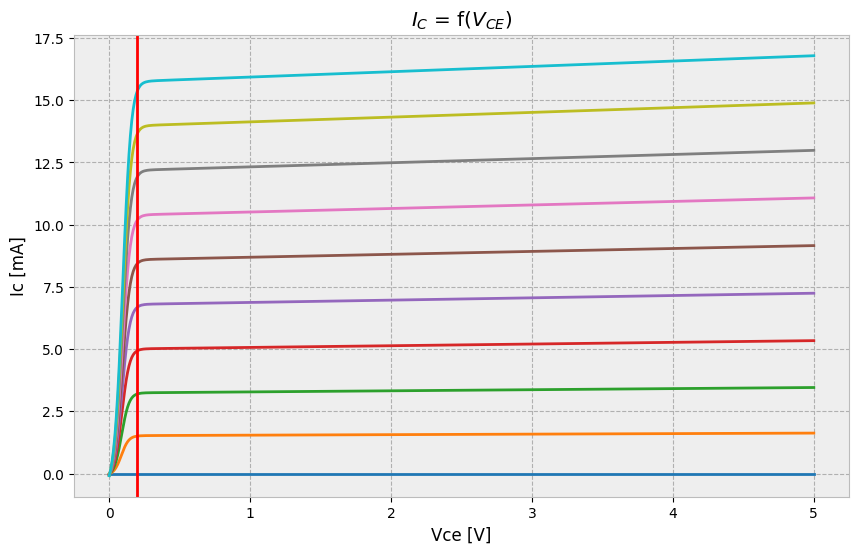

In [7]:
plt.figure(figsize=(10, 6))
plt.title("$I_C$ = f($V_{CE}$)")

for base_current in np.arange(0, 100, 10):
    base_current = base_current@u_uA
    Ibase.dc_value = base_current
    simulator = circuit.simulator(temperature=25, nominal_temperature=25)
    analysis = simulator.dc(Vcollector=slice(0, 5, .01))
    
    plt.plot(analysis.collector, u_mA(-analysis.Vcollector))

plt.xlabel('Vce [V]')
plt.ylabel('Ic [mA]')
plt.axvline(x=.2, color='red')

plt.show()

C:\Users\sacha\anaconda3\envs\pymc_env\Lib\site-packages\PySpice\Unit\Unit.py:1704: RuntimeWarning: divide by zero encountered in divide
  results = super(UnitValues, self).__array_ufunc__(ufunc, method, *args, **kwargs)


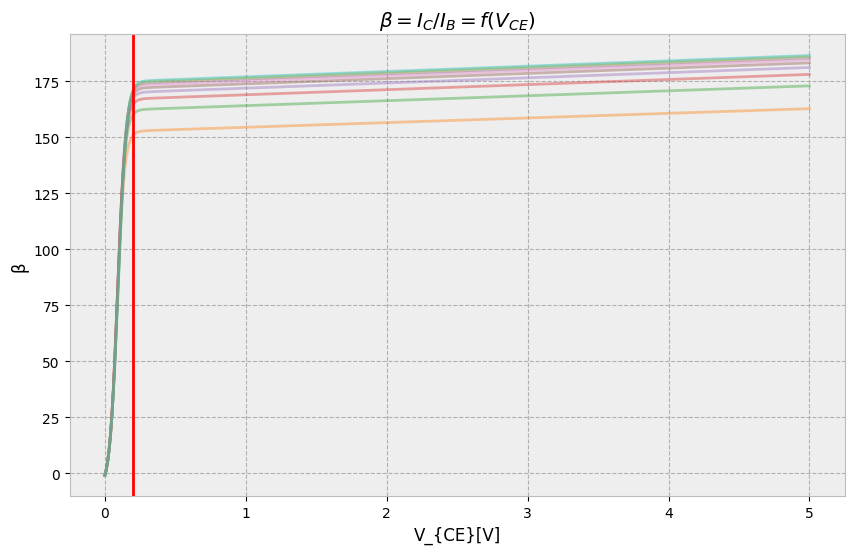

In [8]:
plt.figure(figsize=(10, 6))

plt.title("$β = I_C / I_B = f(V_{CE})$")
for base_current in np.arange(0, 100, 10):
    base_current = base_current@u_uA
    Ibase.dc_value = base_current
    
    simulator = circuit.simulator(temperature=25, nominal_temperature=25)
    analysis = simulator.dc(Vcollector=slice(0, 5, .01))
   
    plt.plot(analysis.collector, -analysis.Vcollector/float(base_current), alpha=0.4)

plt.xlabel('V_{CE}[V]')
plt.ylabel('β')
plt.axvline(x=.2, color='red')
plt.show()